C:\Users\DELL\AppData\Local\Temp\ipykernel_5152\992953733.py:85: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(transpiled_circuit)).result()


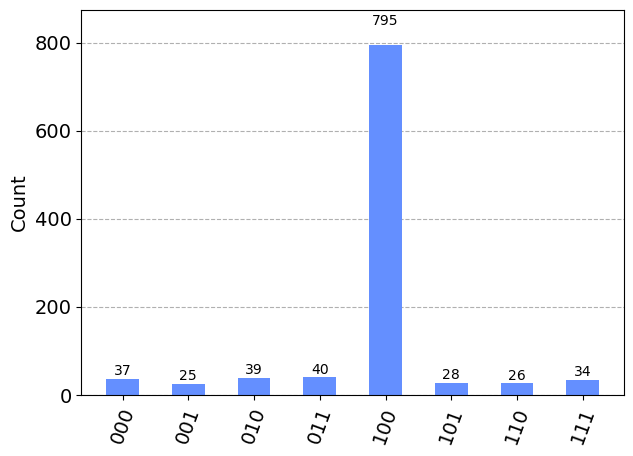

In [14]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def grover_circuit(n, marked_item):
    # Create a quantum circuit with n qubits and n classical bits
    grover_circ = QuantumCircuit(n, n)

    # Apply Hadamard gate to all qubits
    grover_circ.h(range(n))

    # Apply the Grover iteration
    for _ in range(int(n**0.5)):  # Number of iterations for amplitude amplification
        # Oracle: Mark the item
        grover_circ.barrier()
        for i in range(n):
            grover_circ.x(i) if marked_item[i] == '1' else None
        grover_circ.append(oracle(n), range(n))
        for i in range(n):
            grover_circ.x(i) if marked_item[i] == '1' else None

        # Diffusion operator
        grover_circ.append(diffusion(n), range(n))

    # Measure the qubits
    grover_circ.measure(range(n), range(n))

    return grover_circ

def oracle(n):
    # Oracle operator for the marked item
    oracle_circ = QuantumCircuit(n)

    # Implement the oracle using X gates for each qubit marked with '1'
    for qubit in range(n):
        oracle_circ.x(qubit)  # Apply X gate for marked qubits

    # Implement controlled-Z gate (multi-controlled NOT gate)
    oracle_circ.h(n-1)
    oracle_circ.mct(list(range(n-1)), n-1)  # Multi-controlled NOT gate
    oracle_circ.h(n-1)

    return oracle_circ.to_gate()

def diffusion(n):
    # Diffusion operator for amplitude amplification
    diffusion_circ = QuantumCircuit(n)

    # Apply Hadamard gates
    diffusion_circ.h(range(n))

    # Apply X gates
    diffusion_circ.x(range(n))

    # Implement controlled-Z gate (multi-controlled NOT gate)
    diffusion_circ.h(n-1)
    diffusion_circ.mct(list(range(n-1)), n-1)  # Multi-controlled NOT gate
    diffusion_circ.h(n-1)

    # Apply X gates
    diffusion_circ.x(range(n))

    # Apply Hadamard gates
    diffusion_circ.h(range(n))

    return diffusion_circ.to_gate()

# Define the marked item (binary representation)
marked_item = '110'

# Number of qubits
n = len(marked_item)

# Create the Grover circuit
grover_circuit = grover_circuit(n, marked_item)
# Draw the oracle circuit
oracle_circuit = QuantumCircuit(n)
oracle_circuit.append(oracle(n), range(n))
oracle_circuit.draw('mpl')

# Transpile the circuit for the simulator
transpiled_circuit = transpile(grover_circuit, Aer.get_backend('qasm_simulator'))

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(assemble(transpiled_circuit)).result()

# Plot the histogram of measurement outcomes
counts = result.get_counts()
plot_histogram(counts)


